In [1]:
import pytesseract as pt

In [2]:
import cv2 as cv

In [3]:
img = cv.imread('diab_test.png')

In [4]:
p = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [5]:
custom_config = r'--oem 3 --psm 6'
pt.pytesseract.tesseract_cmd = p

In [6]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [7]:

text =pt.image_to_string(img, config= custom_config)

In [8]:
text

'Anjuman College\nHealth report\nName: John Doe Gender: Male Age: 50\nTest Name: Diabetes\nBio Chemical Test\nTest Description Result\nNo. of Pregnancies 6\nGlucose Level 148\nBlood Pressure 2\nSkin Thickness 35\nInsulin 0\nBody Mass Index 33.6\nDiabetes Pedigree 0.627\n'

In [9]:
x1, x2 =[],[]
y1, y2 =[],[]

In [12]:
h, w= img.shape

boxes = pt.image_to_boxes(img, config=custom_config) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    x1.append(int(b[1]))
    x2.append(int(b[3]))
    y1.append(h - int(b[2]))
    y2.append( h - int(b[4]))

In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

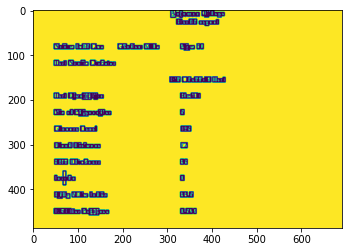

In [14]:
plt.imshow( img)
plt.show

In [11]:
boxes

'A 316 471 319 473 0\nn 308 471 335 487 0\nj 331 484 333 486 0\nu 340 471 343 473 0\nm 348 471 351 473 0\na 334 471 373 482 0\nn 364 471 367 473 0\nC 377 475 388 486 0\no 384 472 392 486 0\nl 389 475 397 482 0\nl 397 475 412 486 0\ne 406 472 414 486 0\ng 413 472 421 482 0\ne 421 475 428 482 0\nH 321 456 328 467 0\ne 321 456 334 467 0\na 337 456 346 467 0\nl 334 456 367 467 0\nt 353 456 359 467 0\nh 358 456 364 467 0\nr 371 453 380 466 0\ne 379 453 385 466 0\np 371 453 402 463 0\no 391 453 400 466 0\nr 402 456 409 463 0\nt 410 456 416 466 0\nN 47 401 59 412 0\na 58 401 66 408 0\nm 67 401 80 408 0\ne 80 401 87 408 0\n: 88 401 91 408 0\nJ 96 401 103 412 0\no 102 401 110 408 0\nh 110 401 126 412 0\nn 120 401 126 412 0\nD 130 401 141 412 0\no 142 401 157 408 0\ne 151 401 157 412 0\nG 189 401 201 412 0\ne 189 401 217 412 0\nn 208 401 217 412 0\nd 217 401 226 412 0\ne 223 401 232 412 0\nr 226 401 240 408 0\n: 241 401 244 408 0\nM 249 401 263 412 0\na 260 401 268 412 0\nl 264 401 282 412 0\ne 

In [13]:
boxes[1]

' '

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame({
    "X1":x1,
    "Y1":y1,
    "X2":x2,
    "Y2":y2,
})

In [21]:
df.to_csv('vis_box1.csv')